Homework 0 Report
==================================================
Note that the professor verbally mentioned that it was recommended to include both the explanations of the answers to the homework as well as the source code and plots needed for the homework in one single report. Therefore, the content in this report contains the answers and explanations for the homework as well as the underlying source code needed to provide these answers.

The GitHub link to the Assignment Repository is :  https://github.com/tmasse11/ECGR_5101
The GitHub link to the Juypter Notebook is : https://github.com/tmasse11/ECGR_5101/blob/main/TerrillMassey_800670388_Homework0.ipynb

Author: Terrill Earl Massey
Student ID: 800670388



The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 1 of the homework. 
===========================================================================================================================
The task is to develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. 

To achieve this task,  we shall first read in and format the input explanatory values and output values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv(r'D3.csv')
dataframe.head()


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [2]:
y  = dataframe.values[:, 3] # Output Values
M = len(y) # Number of Labeled Training Datapoints
x0 = np.ones((M,1)) # Used for multiplication with Theta_0  in calculating the cost value and in the gradient descent algorithm.
x1 = dataframe.values[:, 0] # Explanatory Value x1
x2 = dataframe.values[:, 1] # Explanatory Value x2
x3 = dataframe.values[:, 2] # Explanatory Value x3
x1 = x1.reshape(M,1)
x2 = x2.reshape(M,1)
x3 = x3.reshape(M,1)
x = np.hstack((x0,x1,x2,x3)) # Combine all individual explanatory value columns into a single input set of [X0,X1,X2,X3]. Each column is M rows long.  


The output Y in respect to Explanatory Value X1 is found below.

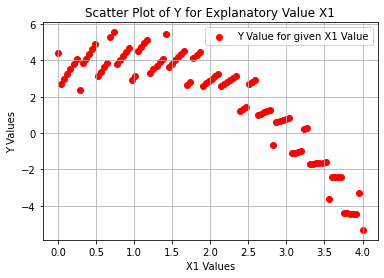

In [3]:
plt.scatter(x1, y, color='red', label="Y Value for given X1 Value")
plt.grid()
plt.xlabel('X1 Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of Y for Explanatory Value X1')
plt.legend()
plt.show()

The output Y in respect to Explanatory Value X2 is found below.

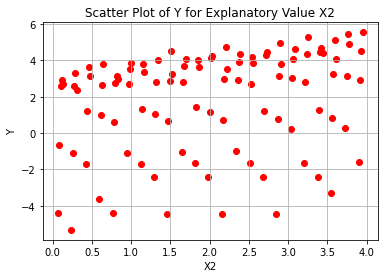

In [4]:
plt.scatter(x2, y, color='red',label="Y Value for given X2 Value")
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter Plot of Y for Explanatory Value X2')
plt.show()

The output Y in respect to Explanatory Value X3 is found below.

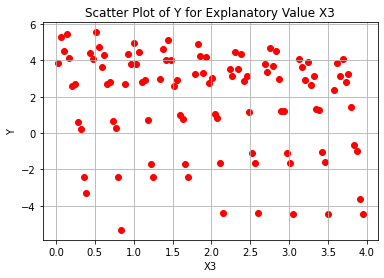

In [5]:
plt.scatter(x3, y, color='red',label="Y Value for given X3 Value")
plt.grid()
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter Plot of Y for Explanatory Value X3')
plt.show()

We will now plot the final regression model and loss over the iteration per each explanatory variable.

First we define the cost function. The cost function used is M.S.E.

In [6]:
def calc_loss(x, y, theta):
    "Compute the loss for linear regression"
    "The loss function used is M.S.E."
    
    """
    Inputs
    ========
    X: 2D array where each column represents explanatory features and each column represents training data point.
    y: 1D array that represents the expected values/labels of the model. Each row repreents a training data point.(1xM)
    theta: 1D array of fitting weights/parameters. (1xn)
    
    Outputs
    ======================
    J : Scalar value that represnts the loss of the function given an explanatory value set and theta values. 
    """

    h_of_x = x.dot(theta) # obtain the predictions of the model. Also referred to as H(x)
    
    errors = np.subtract(h_of_x, y) # subtract the predictions from the labels/expected values. 
    
    errors_sqred = np.square(errors) #square the errors. 
    
    J = 1/(2*M) * np.sum(errors_sqred) # perform a summation on   (h(x_i) - y_i)^2 for all training points. 
    return J

    
    

Now we shall Define the Gradient Descent Algorithm

In [7]:
def gradient_descent_algorithm(x, y,theta,learning_rate, epochs):
    """
    Compute the loss for linear regression using the gradient descent approach. 
    
    Input Parameters
    ---------------------------------------
    X: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3)
    y: 1D array of training labels/target values. Each row represents a label for a training point/epoch.
    theta: 1D array of weights. (1xn)
    learning_rate : Scalar value that represents the alpha scale in the gradient descent formula.
    epochs: Scalar value that represents the number of iterations used in the gradient descent algorithm.
    
    Output Parameters
    ----------------------------------------
    theta : 1D Array of fitting parameters/weights. Dimension (1xn)
    loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points.
    """
    loss_history = np.zeros(epochs) # Create a 1D array that will hold the loss history throughout the gradient descent algorithm. 
    for i in range(0,epochs):     
        h_0 = x.dot(theta) # obtain the predictions of the model. Also referred to as H(x)
        errors = np.subtract(h_0, y)  # subtract the predictions from the labels/expected values. 
        summation_errors = (learning_rate/M) * x.transpose().dot(errors) # Sum all of the errors and then multiply  by alpha/M
        theta  = theta - summation_errors # Update the current theta values.
        loss_history[i] = calc_loss(x,y,theta) #Add to the loss_history tracker.
    return theta, loss_history
    

Now we will perform a gradient descent algorithm on explanatory value X1,X2, and X3, individually.

In [8]:
theta_x1 = [0.,0.] # Define theta_0 and theta_1 with initital values of 0.
iterations = 4000  # Amount of iterations/epochs.
alpha = 0.09 # start with a training rate of 0.09.
theta_x1, cost_history_of_x1 = gradient_descent_algorithm(np.hstack((x0,x1)), y, theta_x1, alpha, iterations)
print("Theta_0 and Theta_1 of X1 =", theta_x1)

Theta_0 and Theta_1 of X1 = [ 5.92794892 -2.03833663]


In [9]:
theta_x2 = [0.,0.] # Define theta_0 and theta_1 with initital values of 0.
iterations = 4000 # Amount of iterations/epochs.
alpha = 0.09 # start with a training rate of 0.09.
theta_x2, cost_history_of_x2 = gradient_descent_algorithm(np.hstack((x0,x2)), y, theta_x2, alpha, iterations)
print("Theta_0 and Theta_1 of X2 =", theta_x2)

Theta_0 and Theta_1 of X2 = [0.73606043 0.55760761]


In [10]:
theta_x3 = [0.,0.] # Define theta_0 and theta_1 with initital values of 0.
iterations = 4000 
alpha = 0.09 # start with a training rate of 0.09.
theta_x3, cost_history_of_x3 = gradient_descent_algorithm(np.hstack((x0,x3)), y, theta_x3, alpha, iterations)
print("Theta_0 and Theta_1 of X3 =", theta_x3)
print("========================================================")

Theta_0 and Theta_1 of X3 = [ 2.8714221  -0.52048288]


Now that we have the final theta values from the gradient descent algorithm, we can now define the linear model for each explanatory value for question 1. 

<b>Answer to Question 1:</b> The linear model is represented in the form H(x) = $\theta$_0 + $\theta$_1*x_i.
With this form, the following linear models can be established for each explanatory inputs: 
 
 Linear Model for Explanatory Value X1 : H(x) = 5.92794892 - 2.03833663x
    
  Linear Model for Explanatory Value X2 : H(x) = 0.73606043 + 0.55760761x
      
  Linear Model for Explanatory Value X3:  H(x) = 2.8714221 - 0.52048288x
      
Note that these linear models were obtained through the gradient descent algorithm with the following specifications: 

    Learning Rate(Alpha) = 0.09
    Iteration Count = 4000
    

====================================================

<b>Answer to Question 2:</b> With the linear models discovered in question 1 above, we are now able to plot the the regression models for each explanatory value. Recall that the regression history for each explanatory value was obtained as an output while implementing the gradient_descent_algorithm function. With these regression histories, we are able to plot the loss over iteration per each explanatory value below.

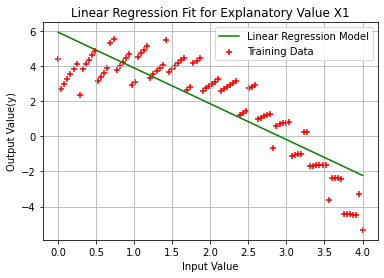

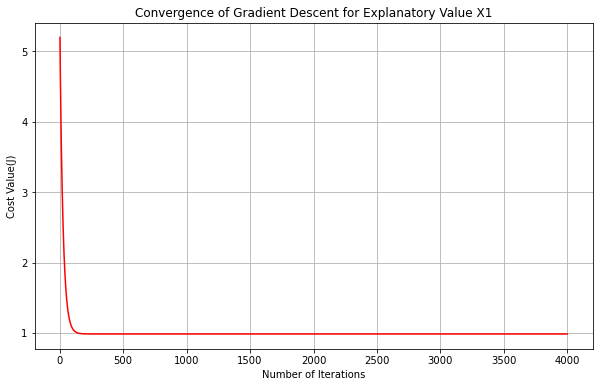

Final Loss Value at Convergence for Explanatory Value x1: 0.9849930825489316


In [11]:
# Plot the linear regression model for explanatory value x1. 

input_values = np.hstack((x0,x1)) # Construct the Input Matrix to be used for multiplying(using dot product) with the theta value matrix and creating the H(x) matrix.

plt.scatter(x[:,1], y, color='red', marker='+', label='Training Data')
plt.plot(x[:,1],input_values.dot(theta_x1), color='green', label='Linear Regression Model')
plt.grid()
plt.xlabel('Input Value')
plt.ylabel('Output Value(y)')
plt.title('Linear Regression Fit for Explanatory Value X1')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()

# Plot the Loss History of X1 as convergence is made with the gradient descent algorithm.

plt.plot(range(1, iterations+1), cost_history_of_x1, color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.title("Convergence of Gradient Descent for Explanatory Value X1")
plt.show()
print("Final Loss Value at Convergence for Explanatory Value x1:", cost_history_of_x1[-1])

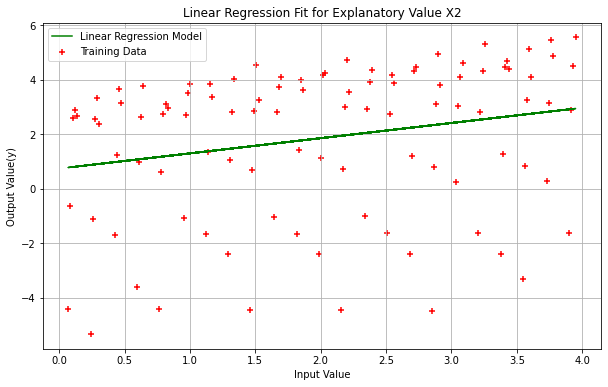

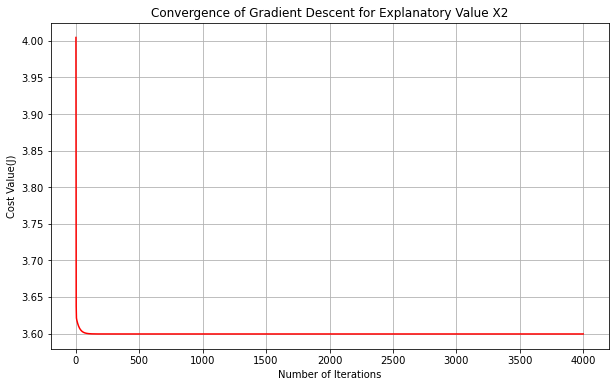

Final Loss Value at Convergence for Explanatory Value X2: 3.599366018177698


In [12]:
# Plot the linear regression model for explanatory value x2. 

input_values = np.hstack((x0,x2)) # Construct the Input Matrix to be used for multiplying(using dot product) with the theta value matrix and creating the H(x) matrix.

plt.scatter(x[:,2], y, color='red', marker='+', label='Training Data')
plt.plot(x[:,2],input_values.dot(theta_x2), color='green', label='Linear Regression Model')
plt.grid()
plt.xlabel('Input Value')
plt.ylabel('Output Value(y)')
plt.title('Linear Regression Fit for Explanatory Value X2')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()

# Plot the Loss History of x2 as convergence is made with the gradient descent algorithm.

plt.plot(range(1, iterations+1), cost_history_of_x2, color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.title("Convergence of Gradient Descent for Explanatory Value X2")
plt.show()
print("Final Loss Value at Convergence for Explanatory Value X2:", cost_history_of_x2[-1])

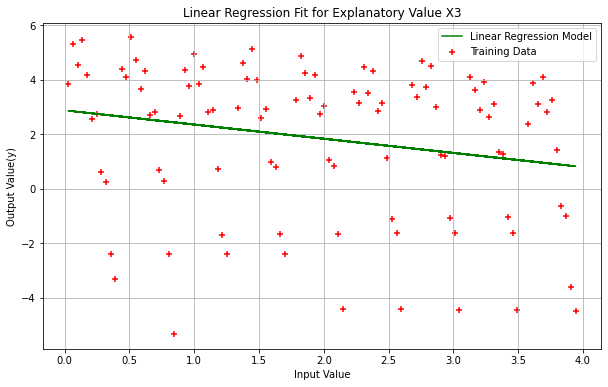

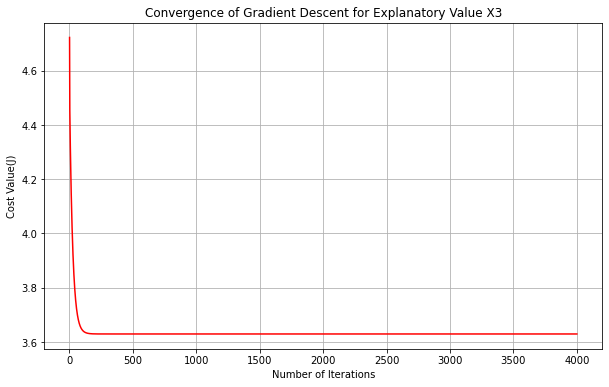

Final Loss Value at Convergence for Explanatory Value X3: 3.6294511246271663


In [13]:
# Plot the linear regression model for explanatory value x3. 

input_values = np.hstack((x0,x3)) # Construct the Input Matrix to be used for multiplying(using dot product) with the theta value matrix and creating the H(x) matrix.

plt.scatter(x[:,3], y, color='red', marker='+', label='Training Data')
plt.plot(x[:,3],input_values.dot(theta_x3), color='green', label='Linear Regression Model')
plt.grid()
plt.xlabel('Input Value')
plt.ylabel('Output Value(y)')
plt.title('Linear Regression Fit for Explanatory Value X3')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()

# Plot the Loss History of x3 as convergence is made with the gradient descent algorithm.

plt.plot(range(1, iterations+1), cost_history_of_x3, color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.title("Convergence of Gradient Descent for Explanatory Value X3")
plt.show()
print("Final Loss Value at Convergence for Explanatory Value X3:", cost_history_of_x3[-1])
print("=========================================================")

<b>Answer to Question 3 : </b>

With the above data plots and final loss value at convergence printouts for explanatory values x1,x2, and x3, we are able to summarize the final loss values all explanatory values (shown below). 

- Final Loss Value for Explanatory Value x1: 0.9849930825489316
- Final Loss Value for Explanatory Value x2: 3.599366018177698
- Final Loss Value for Explanatory Value x3: 3.6294511246271663

With these final loss values, it was concluded that the explanatory value X1 has the lowest loss(cost) for explaning the output Y. 

<b>Answer to Question 4:</b>

In order to describe the impact of using different learning rates on the final loss of the regression model, we will re-calculate the cost histories of each explanatory input values for various learning rates that range from 0.01 to 0.1. 

As indicated in the resulting plots from the code block below, as the alpha value is increased, the cost value is decreased. This trend holds true for all explanatory input values. 
There is a sharp decline in the cost value when the alpha value is increasing between 0.01 and 0.02. As the alpha value is increased from 0.02 to 0.10, there is a very gradual decrease in cost value of the explanatory input values. Note that it was assumed that the learning rate would be a fixed value since it is an input argument to the gradient descent algorithm. However, as indicated in the resulting plots from the code block below, a learning rate of 0.01 will require more iterations to have the gradient descent algorithm converge at the minimum of the gradient descent. A learning rate of 0.10 will require less iterations to have the algorithm converge at the minimum of the graident descent. 

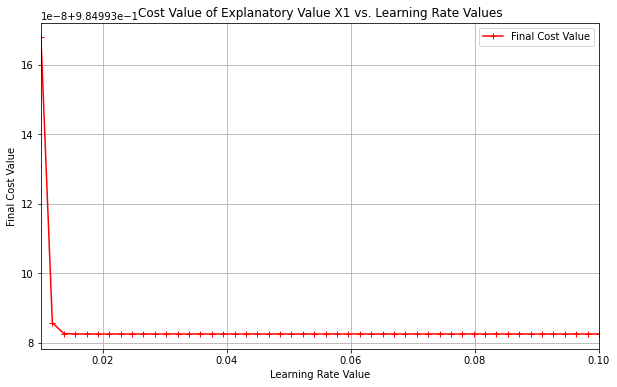

Final Cost Value of X1 with Alpha of 0.01 : 0.9849931678202846
Final Cost Value of X1 with Alpha of 0.1 : 0.9849930825489313



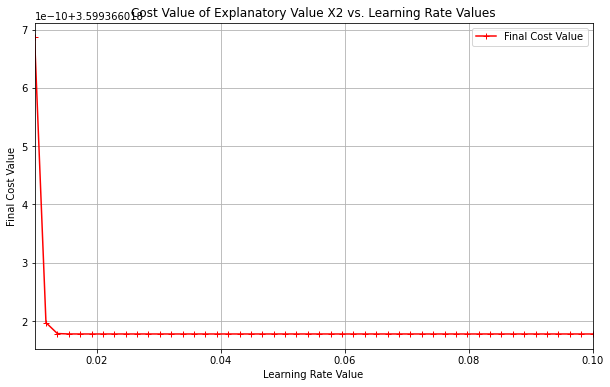

Final Cost Value of X2 with Alpha of 0.01 : 3.5993660186865237
Final Cost Value of X2 with Alpha of 0.1 : 3.5993660181776974



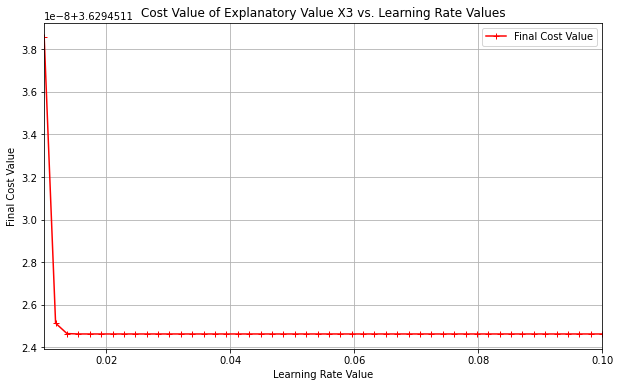

Final Cost Value of X3 with Alpha of 0.01 : 3.629451138552817
Final Cost Value of X3 with Alpha of 0.1 : 3.6294511246271663


In [14]:

learning_rates = np.linspace(0.01, 0.1, 50) # Choose 50 different learning rates that increase in value from 0.01 and 0.1
iterations = 4000 # Set the amount of iterations.
final_loss_history_of_x1 = []
final_loss_history_of_x2 = [] 
final_loss_history_of_x3 = []

for learning_rate in learning_rates:
    # Initialize the theta values to 0 for each explanatory value.
    theta_x1 = [0.,0.]
    theta_x2 = [0.,0.]
    theta_x3 = [0.,0.]
    
    theta_x1, cost_history_of_x1 = gradient_descent_algorithm(np.hstack((x0,x1)), y, theta_x1, learning_rate, iterations)
    theta_x2, cost_history_of_x2 = gradient_descent_algorithm(np.hstack((x0,x2)), y, theta_x2, learning_rate, iterations)
    theta_x3, cost_history_of_x3 = gradient_descent_algorithm(np.hstack((x0,x3)), y, theta_x3, learning_rate, iterations)
    
    # Append the final cost for each explanatory value for the current learning rate value.
    final_loss_history_of_x1.append(cost_history_of_x1[-1])
    final_loss_history_of_x2.append(cost_history_of_x2[-1])
    final_loss_history_of_x3.append(cost_history_of_x3[-1])
    
    
# Now we shall plot the final cost of each explanatory value for all 30 different learning rates.

plt.plot(learning_rates, final_loss_history_of_x1, color='red', marker='+', label='Final Cost Value')
plt.grid()
plt.xlim([min(learning_rates), max(learning_rates)])
plt.xlabel('Learning Rate Value')
plt.ylabel('Final Cost Value')
plt.title('Cost Value of Explanatory Value X1 vs. Learning Rate Values')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()
print("Final Cost Value of X1 with Alpha of {} : {}".format(learning_rates[0],final_loss_history_of_x1[0]))
print("Final Cost Value of X1 with Alpha of {} : {}".format(learning_rates[-1],final_loss_history_of_x1[-1]))
print("===============================================================================================")
print("")

plt.plot(learning_rates, final_loss_history_of_x2, color='red', marker='+', label='Final Cost Value')
plt.grid()
plt.xlim([min(learning_rates), max(learning_rates)])
plt.xlabel('Learning Rate Value')
plt.ylabel('Final Cost Value')
plt.title('Cost Value of Explanatory Value X2 vs. Learning Rate Values')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()
print("Final Cost Value of X2 with Alpha of {} : {}".format(learning_rates[0],final_loss_history_of_x2[0]))
print("Final Cost Value of X2 with Alpha of {} : {}".format(learning_rates[-1],final_loss_history_of_x2[-1]))
print("===============================================================================================")
print("")

plt.plot(learning_rates, final_loss_history_of_x3, color='red', marker='+', label='Final Cost Value')
plt.grid()
plt.xlim([min(learning_rates), max(learning_rates)])
plt.xlabel('Learning Rate Value')
plt.ylabel('Final Cost Value')
plt.title('Cost Value of Explanatory Value X3 vs. Learning Rate Values')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()
print("Final Cost Value of X3 with Alpha of {} : {}".format(learning_rates[0],final_loss_history_of_x3[0]))
print("Final Cost Value of X3 with Alpha of {} : {}".format(learning_rates[-1],final_loss_history_of_x3[-1]))
print("===============================================================================================")

The next resulting sections will cover explanations, code, and plots pertaining to PROBLEM 2 of the homework. 
===========================================================================================================================
The task for Problem 2 is to run a linear regression with gradient descent algorithm using all three explanatory varibables X1,X2,X3.

Question 1: Report the final linear model you found best. 

- in order to find the linear model that works best, we shall peform the gradient descent algorithm for all explanatory values included in the linear model of form H(x) = $\theta$_0 + $\theta$_1 x1 + $\theta$_2  x2 + $\theta$_3 x3


The first step is to setup the theta matrix and our X Matrix.

In [15]:
dataframe = pd.read_csv(r'D3.csv')
dataframe.head() # Read in labeled data


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [16]:
y  = dataframe.values[:, 3] # Output Values
M = len(y) # Number of Labeled Training Datapoints
x0 = np.ones((M,1))
x1 = dataframe.values[:, 0] # Explanatory Value x1
x2 = dataframe.values[:, 1] # Explanatory Value x2
x3 = dataframe.values[:, 2] # Explanatory Value x3
x1 = x1.reshape(M,1) 
x2 = x2.reshape(M,1)
x3 = x3.reshape(M,1)
x = np.hstack((x0,x1,x2,x3)) # stack together all input explanatory values.


The second step is to perform the gradient descent algorithm on the input matrix for multiple alpha values. During these gradient descent algorithm runs, we shall analyze the final cost value at each alpha value. We shall choose the alpha value that produces the lowest final cost value. 

NOTE: The gradient_descent_algorithm and calc_loss functions have already been defined/declared earlier in this jyupter notebook. However for legibility, these functions are redefined below.

In [17]:
def calc_loss(x, y, theta):
    "Compute the loss for linear regression"
    "The loss function used is M.S.E."
    
    """
    Inputs
    ========
    X: 2D array where each column represents explanatory features and each column represents training data point.
    y: 1D array that represents the expected values/labels of the model. Each row repreents a training data point.(1xM)
    theta: 1D array of fitting weights/parameters. (1xn)
    
    Outputs
    ======================
    J : Scalar value that represnts the loss of the function given an explanatory value set and theta values. 
    """

    h_of_x = x.dot(theta) # obtain the predictions of the model. Also referred to as H(x)
    
    errors = np.subtract(h_of_x, y) # subtract the predictions from the labels/expected values. 
    
    errors_sqred = np.square(errors) #square the errors. 
    
    J = 1/(2*M) * np.sum(errors_sqred) # perform a summation on   (h(x_i) - y_i)^2 for all training points. 
    return J

    

In [18]:
def gradient_descent_algorithm(x, y,theta,learning_rate, epochs):
    """
    Compute the loss for linear regression using the gradient descent approach. 
    
    Input Parameters
    ---------------------------------------
    X: 2D array where each row represents a training point and each column represent a training feature(i.e. X1, X2, X3)
    y: 1D array of training labels/target values. Each row represents a label for a training point/epoch.
    theta: 1D array of weights. (1xn)
    learning_rate : Scalar value that represents the alpha scale in the gradient descent formula.
    epochs: Scalar value that represents the number of iterations used in the gradient descent algorithm.
    
    Output Parameters
    ----------------------------------------
    theta : 1D Array of fitting parameters/weights. Dimension (1xn)
    loss_history : 1D array that contains cost value for each iteration/epoch. Dimension(Mx1) where M = Number of Training data points.
    """
    loss_history = np.zeros(epochs) # Create a 1D array that will hold the loss history throughout the gradient descent algorithm. 
    for i in range(0,epochs):     
        h_0 = x.dot(theta)
        errors = np.subtract(h_0, y)
        summation_errors = (learning_rate/M) * x.transpose().dot(errors)
        theta  = theta - summation_errors
        loss_history[i] = calc_loss(x,y,theta)
    return theta, loss_history
    

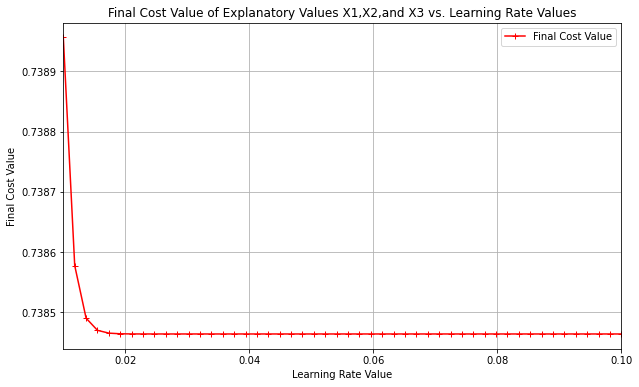

Final Cost Value with Alpha of 0.01 : 0.7389562132059079
Final Cost Value with Alpha of 0.1 : 0.7384642415649304


In [19]:
learning_rates = np.linspace(0.01, 0.1, 50) #Choose 50 different learning rates that increase in value from 0.01 and 0.1
final_cost_values = [] # list that will hold the final cost value for each learing rate/alpha value.
iterations = 4000 # Set the number of iterations.

for learning_rate in learning_rates:
    theta = [0.,0.,0.,0.] # We need to create a matrix of initial theta values of form [theta_0, theta_1, theta_2, theta_3]
    theta, cost_history = gradient_descent_algorithm(x, y, theta, learning_rate, iterations) # Perform gradient descent algorithm.
    final_cost_values.append(cost_history[-1]) # Obtain the final cost value for the current alpha value. 
    
# Plot a graph that show the final cost values of the linear regression model for each learning rate value chosen.
plt.plot(learning_rates, final_cost_values, color='red', marker='+', label='Final Cost Value')
plt.grid()
plt.xlim([min(learning_rates), max(learning_rates)])
plt.xlabel('Learning Rate Value')
plt.ylabel('Final Cost Value')
plt.title('Final Cost Value of Explanatory Values X1,X2,and X3 vs. Learning Rate Values')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()
print("Final Cost Value with Alpha of {} : {}".format(learning_rates[0],final_cost_values[0]))
print("Final Cost Value with Alpha of {} : {}".format(learning_rates[-1],final_cost_values[-1]))
print("===============================================================================================")

As illustrated in the Final Cost Value of Explanatory Values X1,X2, and X3 vs. Learning Rate Values plot above, the lowest cost value is 0.7384642415649304.This cost value was achieved with a alpha/learning rate of 0.1. Therefore we shall use this learning rate when constructing our linear regression model.


In [20]:
learning_rate = 0.1 # Alpha Value of the Gradient Descent Algorithm.
iterations = 4000 # Set the number of iterations.
theta = [0.,0.,0.,0.] # A matrix of initial theta values of form [theta_0, theta_1, theta_2, theta_3]
theta, cost_history = gradient_descent_algorithm(x, y, theta, learning_rate, iterations) # Perform gradient descent algorithm.
print("The final theta values are : ", theta)

The final theta values are :  [ 5.31416717 -2.00371927  0.53256334 -0.26560187]


<b>Answer to Question 1:</b> With the final theta values calculated with the descent algorithm above, we can construct a linear model of form H(x) = $\theta$_0 + $\theta$_1 x1 + $\theta$_2  x2 + $\theta$_3 x3.

Therefore, the final linear model that I've found best is : H(x) = 5.31416717 - 2.00371927(X1) + 0.53256334(X2) - 0.26560187(X3)

====================================================================================================

Question 2: Plot the loss over the iteration.

<b>Answer to Question 2:</b>
This is achieved through plotting the cost_history matrix. 
The plot Convergence of Gradient Descent for Explanatory Values(X1,X2, and X3) illustrates the loss over over the iteration. 
    

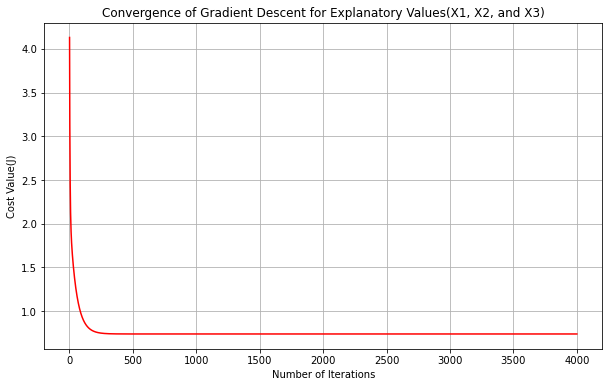

In [21]:
# Plot the Loss History of X as convergence is made with the gradient descent algorithm.

plt.plot(range(1, iterations+1), cost_history, color='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value(J)")
plt.title("Convergence of Gradient Descent for Explanatory Values(X1, X2, and X3)")
plt.show()


<b>Answer to Question 3:</b> Through looking at the Final Cost Value of Explanatory Values X1, X2, and X3 vs. Learning Rate Values plot above, a trend for the final cost values can be made. It was observed that as the learning rate was increased in value, the final loss value was decreased.  As the learning rate was increased from 0.01 to 0.02, the final loss values decreased somewhat sharply. As the learning rate was increased from 0.02 to 0.10, the final loss value decreased slightly. Note that it was assumed that the learning rate would be a fixed value since it is an input argument to the gradient descent algorithm. However, as indicated in Final Cost Value of Explanatory Values X1, X2, and X3 vs. Learning Rate Values plot above, a learning rate of 0.01 will require more iterations to have the gradient descent algorithm converge at the minimum of the gradient descent. A learning rate of 0.10 will require less iterations to have the algorithm converge at the minimum of the graident descent. 

<b>Answer to Question 4 :</b> 

Recall that this question request that we predict the value of y for new (X1,X2,X3) values. Utlizing the linear regression model that was constructed in question 1, the predicted y value for each set of (X1,X2,X3) values are found in the code section below.


In [22]:
# Set up the different input values (X1,X2,X3) as defined by Question 4.
input_values_1 = [1,1,1]
input_values_2 = [2,0,4]
input_values_3 = [3,2,1]

# Calculate Y value for First set of input values.
linebreak = "=============================================================================================================="
print("")
print("Recall that our theta values in our linear regression model in the form [theta_0, theta_1, theta_2, theta_3] are: ", theta)
print(linebreak)
y1 = theta[0] + (theta[1]*input_values_1[0]) + (theta[2]*input_values_1[1])+ (theta[3]*input_values_1[2])
print("The Value of y for input values ({},{},{}) is : {}".format(input_values_1[0],input_values_1[1], input_values_1[2], y1))
print(linebreak)
y2 = theta[0] + (theta[1]*input_values_2[0]) + (theta[2]*input_values_2[1])+ (theta[3]*input_values_2[2])
print("The Value of y for input values ({},{},{}) is : {}".format(input_values_2[0],input_values_2[1], input_values_2[2], y2))
print(linebreak)
y3 = theta[0] + (theta[1]*input_values_3[0]) + (theta[2]*input_values_3[1])+ (theta[3]*input_values_3[2])
print("The Value of y for input values ({},{},{}) is : {}".format(input_values_3[0],input_values_3[1], input_values_3[2], y3))
print(linebreak)
    


Recall that our theta values in our linear regression model in the form [theta_0, theta_1, theta_2, theta_3] are:  [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
The Value of y for input values (1,1,1) is : 3.5774093743331417
The Value of y for input values (2,0,4) is : 0.2443211728082897
The Value of y for input values (3,2,1) is : 0.10253417286412025
